# Introduction to LangGraph

## Adding Multiple keys and values into the *State* 
Well during the previous couple of experement I clarified below points about *LangGraph*. 
+ I can create a *graph* structure creating an instance of *LangGraph StateGraph* class. 
+ I can add *nodes* into the graph. 
+ Each *node* requires two things, a *name* for the *node* and an *action*, which defines what's that *node* is supposed to do when that *node* is called. 
    + *name* I can specify as a string "greeting_node"
    + *action* The best practise is to define a python function as we normally define with `def` and take that function as the *action* of the *node*
+ I needed to set the starting place (node) of the *graph* by setting the *entry_point* and similarly I had to set the finishing place (node) by setting *finish_point*
+ The `StateGraph` instance requires an input which is named *Graph State* variable. The best practice is to define a *Graph State* variable with *python type hinting* as a `TypedDict` dictionary object. 
+ Each node requires to accept an input, and that input is the *Graph State*. 
+ I can add multiple nodes into the *graph*.
+ Once I add multiple nodes into the *graph* I need to connect the *nodes* with each other using *edges*
+ We can make changes to the *Graph State* variable and pass it to the next nodes by *returning* that *Graph State* variable at the end of each *node function*. 

The *Graph State* variable I have tried so far was a very simple dictionary which had only one *key*. What if I wanted to add multiple *keys* in the *Graph State*. How can I do that? Let's try to clarify all those questions now. 

Let me define a simple graph with one *node* but multiple *keys* in the *Graph State*. 



In [1]:
from typing import TypedDict, List 
from langgraph.graph import StateGraph 


Before defining the *Graph State* with multiple *keys*, what we need to figure out is *"What are are trying to get done with the Graph?*. Answer to that question will lead us to the structure of the *Graph State (keys needed with which type)*. 

Let's say I to the *graph* to give me a the *sum* of a list of numbers, given me the final answer. I also want it to greet me with my name and say *"Your Sum:"*. Now for that I would need few keys in my *Graph State*. The first few *keys* which comes to my mind are below. 
+ values -> List of numbers which I want to calculate the sum of
+ name -> my name, so the *graph* can personalize the final response. 
+ result -> final result (sum of the given values)

Now Let me create a *Graph State* with 3, keys. 

In [2]:
# Add Code Here to defint the Graph State
class AgentState(TypedDict):
    name: str
    values: List[int]
    result: int

Next we need to define *action* for the *node*, which is the *node function*. As the first case, I am going to assume that, *values*, *name* is given and the *result* will be given as `None`. 

In [3]:
# Define the Node Function. 
def sum_values(state: AgentState) -> AgentState:
    # Displaying the initial state
    print(f"\nInitial state:\n {state}\n")
    # Calculate the sum of values
    state['result'] = sum(state['values'])
    # Display the final result
    print(f"Hey, {state['name']}, the sum of your values is: {state['result']}")
    # Displaying the final state
    print(f"\nFinal state:\n {state}\n")
    # Return the updated state
    return state
# Display the state at the beginning of the node execution
# values = List[int], name = str and result = int but initially None 
# Function will calculate the sum of values and store it in result 
# Then display the final result by calling the user's name. 
# Display the state at the end of the function excution

Now let me build the graph. 

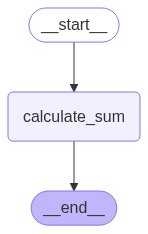

In [4]:
# Building the Graph 
# Create a StateGraph instance 
# add the node function to the graph with a name = calculate_sum 
# Set entry point and finish point of the graph
# compile the graph
# visualize the graph 
graph = StateGraph(AgentState)
graph.add_node("calculate_sum", sum_values)
graph.set_entry_point("calculate_sum")
graph.set_finish_point("calculate_sum")
app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png())   )

Now let us define an input variable with similar structure to the *Graph State*. 

In [5]:
# Define input values, name and result 
initial_state: AgentState = {
    "name": "Alice",
    "values": [1, 2, 3, 4, 5],
    "result": None
}

Let me run the *graph*. 

In [6]:
# Running the graph
answer = app.invoke(initial_state)


Initial state:
 {'name': 'Alice', 'values': [1, 2, 3, 4, 5], 'result': None}

Hey, Alice, the sum of your values is: 15

Final state:
 {'name': 'Alice', 'values': [1, 2, 3, 4, 5], 'result': 15}



In [7]:
print(f"\nFinal Answer: {answer}\n")


Final Answer: {'name': 'Alice', 'values': [1, 2, 3, 4, 5], 'result': 15}



Now, what if
+ I didn't provide the value of `result` in my input variable
+ what if I didn't provide my `name` in my input variable
+ what if I didn't provide the list of `values` in my input variable, basically can I pass an empty *Graph State* initially

Let's me try to clarify all those questions, one by one. This is fun!!!